In [39]:
#importing the libraries 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#importing dataset 
Data = pd.read_csv("/Users/rileydouglas/Downloads/bank-full.csv")
Data 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Exploring the dataset 

In [41]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [42]:
Data.shape

(45211, 17)

In [43]:
#discriptive statistics of variables 
Data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [44]:
#Identifying the data types of the variable
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
#Checking for any null values in the dataset 
Data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

### Idnetifying unique values 

In [45]:
#identifying the unique values in the columns 
Data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [46]:
#checking unique values per column 
a = Data['age'].unique()
print(a)

b = Data['job'].unique()
print(b)

c = Data['marital'].unique()
print(c)

d = Data['education'].unique()
print(d)

e = Data['housing'].unique()
print(e)

f = Data['loan'].unique()
print(f)

g = Data['contact'].unique()
print(g)

[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']


## Visualizing the data to further understand it 

In [47]:
#determining the categorical features of the dataset
categorical_features = [feature for feature in Data.columns if ((Data[feature].dtypes=='O') & (feature not in ['deposit' ]))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'Target']

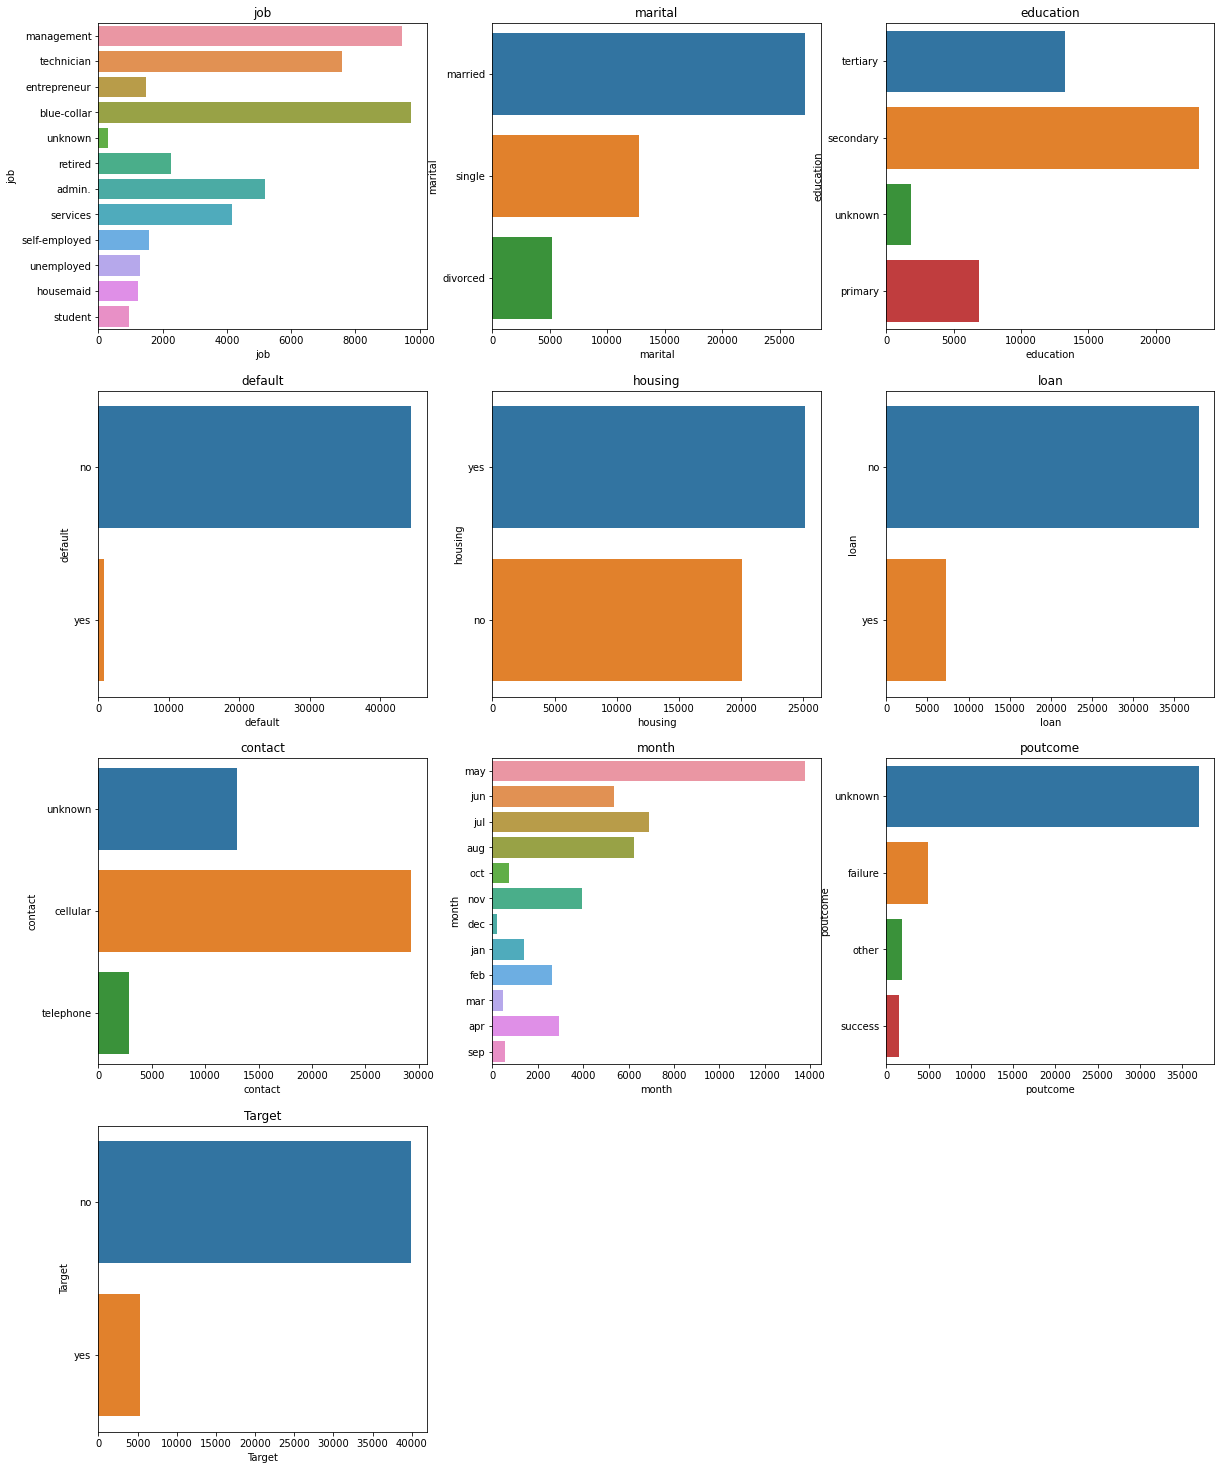

In [48]:
#understanding the categorical variables by visualizing them using plots 
plt.figure (figsize=(20,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=Data)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

## Converting categorical variables into numerical representations

In [72]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Perform label encoding on the "Category" column
Data["job_new"] = le.fit_transform(Data["job"])

Data["marital_new"] = le.fit_transform(Data["marital"])

Data["education_new"] = le.fit_transform(Data["education"])

Data["Target_new"] = le.fit_transform(Data["Target"])

In [73]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,Target,job_new,marital_new,education_new,Target_new
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,4,1,2,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,9,2,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,2,1,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,1,1,3,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,11,2,3,0


## Heat map to further study and analyse the correlation of the variables 

In [74]:
correlation = Data.corr()
correlation

,age,balance,day,duration,campaign,pdays,previous,job_new,marital_new,education_new,Target_new
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,-0.021868,-0.403240,-0.106807,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.018232,0.002122,0.064514,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,0.022856,-0.005261,0.022671,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.004744,0.011852,0.001935,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,0.006839,-0.008994,0.006255,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,-0.024455,0.019172,0.000052,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,-0.000911,0.014973,0.017570,0.093236
job_new,-0.021868,0.018232,0.022856,0.004744,0.006839,-0.024455,-0.000911,1.000000,0.062045,0.166707,0.040438
marital_new,-0.403240,0.002122,-0.005261,0.011852,-0.008994,0.019172,0.014973,0.062045,1.000000,0.108576,0.045588
education_new,-0.106807,0.064514,0.022671,0.001935,0.006255,0.000052,0.017570,0.166707,0.108576,1.000000,0.066241


<AxesSubplot:>

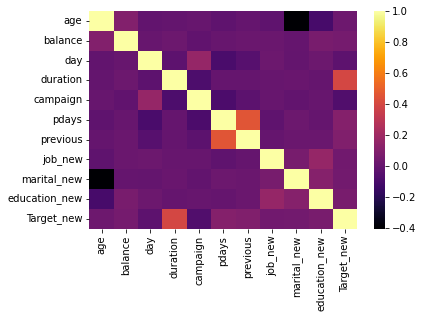

In [75]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=False, cmap='inferno')

# Model Selection

In [212]:
# split the data into features (X) and target variable (y)
X = Data[['age','duration','job_new','education_new', 'marital_new','campaign','pdays','previous']]  
y = Data['Target_new']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

## Logistic regression 

In [213]:
# Create an instance of the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7976
           1       0.56      0.18      0.27      1067

    accuracy                           0.89      9043
   macro avg       0.73      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



/Users/rileydouglas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [214]:
len(X_train)

36168

In [215]:
len(X_test)

9043

In [216]:
#Calculating the accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)
print("Training Accuracy", model.score(X_train, y_train)) 
print("Accuracy:", accuracy)

Training Accuracy 0.8877184251271842
Accuracy: 0.8847727524051753


In [217]:
#testing model accuracy 

print("Model accuracy",model.score(X_test, y_test))

Model accuracy 0.8866526595156474


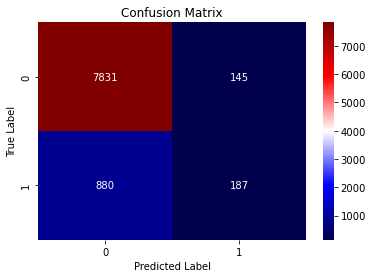

In [232]:
from sklearn.metrics import confusion_matrix

# compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="seismic")

# customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Decision Tree

In [219]:
from sklearn.tree import DecisionTreeClassifier

#creating an object of Decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

#fitting the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [220]:
prediction = clf.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [221]:
DTac = accuracy_score(y_test,prediction)
print("Accuracy:", DTac)

Accuracy: 0.8879796527700984


In [222]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7976
           1       0.57      0.21      0.30      1067

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.62      9043
weighted avg       0.86      0.89      0.86      9043



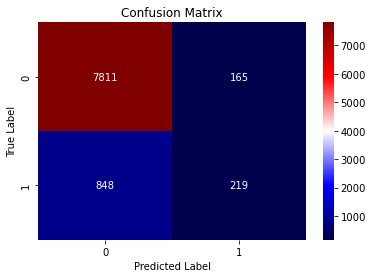

In [234]:
cm = confusion_matrix(y_test, prediction)

# display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="seismic")

# customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()